# SmartLab project 1
## Handle image, html and sound data

#### Magic commands and package import

In [1]:
%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from scipy.io import wavfile

### 1. Exercise: read 5 different pictures, plot and show the RGB channels (matrices)
#### Read pictures with matplotlib, arrange them to a list and then plot with a for loop

In [3]:
pics = [img1, img2, img3, img4, img5] = plt.imread( 'image1.jpg'), plt.imread( 'image2.jpg'), plt.imread( 'image3.jpg'), plt.imread( 'image4.jpg'), plt.imread( 'image5.jpg')

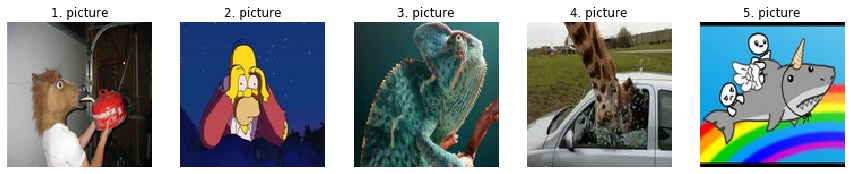

In [4]:
plt.figure( figsize= ( 15, 15))
for i in range( 1,6):
    plt.subplot( 1,5,i)
    plt.title( '%d. picture' % i)
    plt.imshow( pics[i-1])
    plt.axis( 'off')

#### Separate RGB channels (3D array to 2D array), flatten them to 1D array than plot the RGB histograms for the images

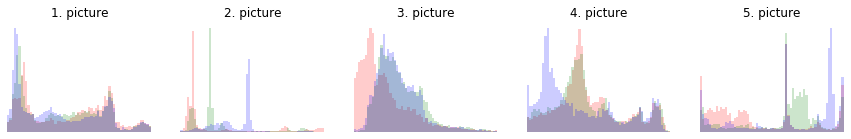

In [5]:
plt.figure( figsize= (15, 2))
for i in range( 1,6):
    plt.subplot( 1,5,i)
    plt.title( '%d. picture' % i)
    red, green, blue = pics[ i-1][:,:,0], pics[ i-1][:,:,1], pics[ i-1][:,:,2]
    red_flat, green_flat, blue_flat = red.flatten(), green.flatten(), blue.flatten()
    plt.xlim( 0, 256)
    plt.hist( red_flat, color= 'red', alpha= 0.2, bins= 64, density= True)
    plt.hist( green_flat, color= 'green', alpha= 0.2, bins= 64, density= True)
    plt.hist( blue_flat, color= 'blue', alpha= 0.2, bins= 64, density= True)
    plt.axis( 'off')

#### The previous code showed RGB channels visually and here is numerically. For less space I print it only for the first image

In [6]:
red_pixels = img1[:,:,0]
green_pixels = img1[:,:,1]
blue_pixels = img1[:,:,2]

In [7]:
red_pixels

array([[140, 122, 124, ...,   5,   4,   4],
       [144, 125, 128, ...,   8,   8,   8],
       [147, 129, 132, ...,  10,  10,  10],
       ...,
       [164, 149, 154, ...,   5,   2,   0],
       [159, 144, 149, ...,   3,   2,   1],
       [157, 141, 146, ...,   1,   3,   5]], dtype=uint8)

In [8]:
green_pixels

array([[143, 125, 127, ...,   5,   4,   4],
       [144, 125, 128, ...,   8,   8,   8],
       [146, 128, 131, ...,  10,  10,  10],
       ...,
       [166, 151, 156, ...,   5,   2,   0],
       [163, 148, 153, ...,   3,   2,   1],
       [161, 145, 150, ...,   1,   3,   5]], dtype=uint8)

In [9]:
blue_pixels

array([[150, 132, 134, ...,   5,   4,   4],
       [152, 133, 136, ...,   8,   8,   8],
       [154, 136, 139, ...,  10,  10,  10],
       ...,
       [165, 150, 155, ...,   5,   2,   0],
       [162, 147, 152, ...,   3,   2,   1],
       [160, 144, 149, ...,   1,   3,   5]], dtype=uint8)

### 2. Exercise: for each image and each color channel get the mean and standard deviation, standardize the data sets, check the mean and standard deviation again
 **i loop** specify the pictures, **j loop** specify the RGB channels
#### For standardization I used the following formula: 
\begin{equation*}
z = \frac {x-M}{SD}
\end{equation*}
#### Where
- z = element of the data set
- x = mean
- SD = standard deviation

In [10]:
standardized = []

for i in range(5):
    for j in range(3):
        pixels = pics[i][:,:,j].flatten()
        pixels_mean = pixels.mean()
        pixels_std = pixels.std()
        pixels_stand = ( pixels - pixels_mean)/ pixels_std
        standardized.append( pixels_stand)

#### Dictionary key values: lists with specific *picture - color* channel pairs

In [11]:
pixel_list_mean = []

for i in range(1,6):
    pixel_list_mean.append( 'img%d_red_mean' % i)
    pixel_list_mean.append( 'img%d_green_mean' % i)
    pixel_list_mean.append( 'img%d_blue_mean' % i)
    
pixel_list_std = []

for i in range(1,6):
    pixel_list_std.append( 'img%d_red_std' % i)
    pixel_list_std.append( 'img%d_green_std' % i)
    pixel_list_std.append( 'img%d_blue_std' % i)

#### Dictionary value pairs: append them to a list and round them because the e17th element isn't 0 in some case
#### Join the key - value pairs in a dictionary

In [12]:
mean_list = []
 
for i in range(15):
    mean_list.append( round( standardized[i].mean(), 10))
    
dict( zip( pixel_list_mean, mean_list))

{'img1_red_mean': -0.0,
 'img1_green_mean': 0.0,
 'img1_blue_mean': 0.0,
 'img2_red_mean': 0.0,
 'img2_green_mean': 0.0,
 'img2_blue_mean': 0.0,
 'img3_red_mean': -0.0,
 'img3_green_mean': 0.0,
 'img3_blue_mean': -0.0,
 'img4_red_mean': 0.0,
 'img4_green_mean': 0.0,
 'img4_blue_mean': 0.0,
 'img5_red_mean': 0.0,
 'img5_green_mean': 0.0,
 'img5_blue_mean': 0.0}

In [13]:
std_list = []

for i in range(15):
    std_list.append( round( standardized[i].std(), 10))
    
dict( zip( pixel_list_std, std_list))

{'img1_red_std': 1.0,
 'img1_green_std': 1.0,
 'img1_blue_std': 1.0,
 'img2_red_std': 1.0,
 'img2_green_std': 1.0,
 'img2_blue_std': 1.0,
 'img3_red_std': 1.0,
 'img3_green_std': 1.0,
 'img3_blue_std': 1.0,
 'img4_red_std': 1.0,
 'img4_green_std': 1.0,
 'img4_blue_std': 1.0,
 'img5_red_std': 1.0,
 'img5_green_std': 1.0,
 'img5_blue_std': 1.0}

### 3. Exercise: extract text from the webpage, show it and make a histogram of letters
#### requests.get() function makes a raw html file from the webpage then BeautifulSoup converts it to a more readable form
#### The only problem that the soup file contains scripts and other html elements. To solve this problem I searched stack overflow for some help.

In [14]:
url = 'https://blog.keras.io/the-future-of-deep-learning.html'
html_raw = requests.get( url).text
soup = BeautifulSoup( html_raw)

for script in soup(["script", "style"]):
    script.extract()
    
html_text = soup.get_text()
lines = (line.strip() for line in html_text.splitlines())
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
text = '\n'.join(chunk for chunk in chunks if chunk)
text

'The future of deep learning\nThe Keras Blog\nKeras is a Deep Learning library for Python, that is simple, modular, and extensible.\nArchives\nGithub\nDocumentation\nGoogle Group\nThe future of deep learning\nTue 18 July 2017\nBy Francois Chollet\nIn Essays.\nThis post is adapted from Section 3 of Chapter 9 of my book, Deep Learning with Python (Manning Publications).\nIt is part of a series of two posts on the current limitations of deep learning, and its future.\nYou can read the first part here: The Limitations of Deep Learning.\nGiven what we know of how deep nets work, of their limitations, and of the current state of the research landscape,\ncan we predict where things are headed in the medium term? Here are some purely personal thoughts. Note that I don\'t have a crystal ball,\nso a lot of what I anticipate might fail to become reality. This is a completely speculative post.\nI am sharing these predictions not because I expect them to be proven\ncompletely right in the future, b

#### The list() function separates all letters from the previous text file then converts them to alphabetic order
#### The list of letters contains non-alphabetic caracters too, the for loop sort out these
#### For counting I make a dictionary: inside a list comprehension with .count() method

In [15]:
splitted_text = sorted( list( text))

letters = []
for char in splitted_text:
    if  char.isalpha():
        letters.append( char)
        
counted_alphabets = { x: letters.count( x) for x in letters}

#### Key values are the *x axis* and values are the *y axis* in the barchart

<BarContainer object of 49 artists>

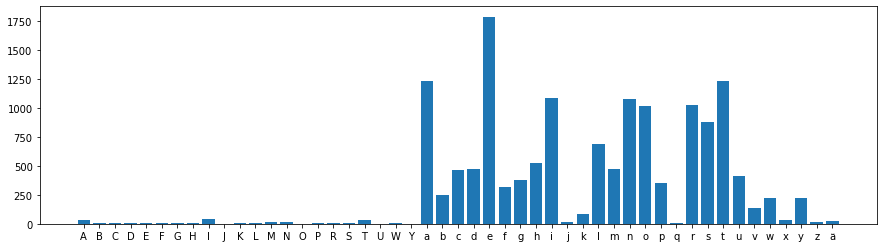

In [16]:
plt.figure( figsize= (15, 4))
plt.bar( counted_alphabets.keys(), counted_alphabets.values())

### 4. Exercise: read a sound file and show the spectogram
#### The scipy package handles my .wav file (from Star Wars). It's .read() function extracts 2 values: the sample frequency and sound data

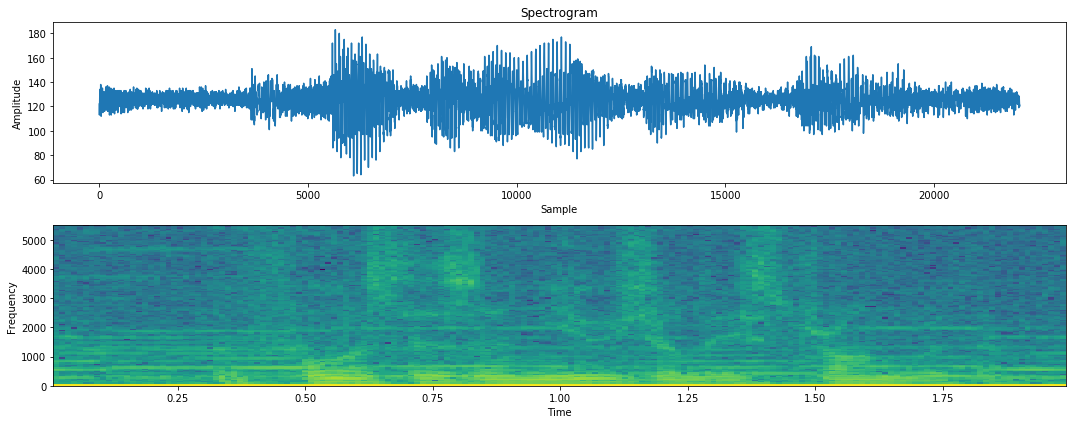

In [20]:
freq, signal = wavfile.read( 'forceisstrong.wav')

plt.figure( figsize= (15, 6))

plt.subplot( 2,1,1)
plt.title( 'Spectrogram')
plt.xlabel( 'Sample')
plt.ylabel( 'Amplitude')
plt.plot( signal)

plt.subplot( 2,1,2)
plt.specgram( signal, Fs= freq)
plt.xlabel( 'Time')
plt.ylabel( 'Frequency')
plt.tight_layout()